In [1]:
!pip install pulp
import pulp
!apt-get install -y -qq glpk-utils
from pulp import GLPK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.7 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking 

In [2]:
import pandas as pd
import numpy as np
import pulp
url = 'https://raw.githubusercontent.com/PhuphaB/Dissertation/main/ESPN_Top_40_Players.csv'
data = pd.read_csv(url, skiprows=[0]) # Skip the first row

In [3]:
# Rename columns for easier access
data.columns = [
    'ESPN_Ranking', 'Player', 'Team', 'Team_IG_Followers_M',
    'PER', 'Minutes_Played', 'Clutch_PPG', 'Win_Shares',
    'True_Shooting_Pct', 'IG_Growth_Pct', 'IG_Engagement_Pct',
    'Player_IG_Followers_M', 'Google_Trends_Score', 'All_Star_Votes_M'
]

# Check updated column names
data.head()

,ESPN_Ranking,Player,Team,Team_IG_Followers_M,PER,Minutes_Played,Clutch_PPG,Win_Shares,True_Shooting_Pct,IG_Growth_Pct,IG_Engagement_Pct,Player_IG_Followers_M,Google_Trends_Score,All_Star_Votes_M
0,2,Luka Doncic,Los Angeles Lakers,25.32,24.1,1769,1.9,5.9,58.7,24.00,7.12,10.49,5.58,2.03
1,3,Giannis Antetokounmpo,Milwaukee Bucks,5.50,30.5,2289,2.9,11.5,62.5,1.26,1.79,15.99,32.74,4.44
2,4,Shai Gilgeous-Alexander,Oklahoma City Thunder,6.16,30.7,2598,3.0,16.7,63.7,69.19,10.73,4.01,41.52,3.15
3,5,Jayson Tatum,Boston Celtics,8.46,21.7,2624,3.0,9.5,58.2,10.60,5.22,7.30,32.02,3.61
4,6,Stephen Curry,Golden State Warriors,32.72,21.5,2252,3.6,7.9,61.8,6.20,0.77,58.11,29.29,2.34


In [4]:
# Generate descriptive statistics for all numerical columns
numeric_stats = data.describe()
print(numeric_stats)

       ESPN_Ranking  Team_IG_Followers_M        PER  Minutes_Played  \
count     40.000000            40.000000  40.000000       40.000000   
mean      21.500000             7.417000  20.577500     2042.850000   
std       11.690452             7.814991   3.857227      632.230912   
min        2.000000             1.420000  13.500000      574.000000   
25%       11.750000             3.660000  18.300000     1675.000000   
50%       21.500000             4.610000  20.050000     2236.500000   
75%       31.250000             6.300000  22.475000     2467.500000   
max       41.000000            32.720000  30.700000     3036.000000   

       Clutch_PPG  Win_Shares  True_Shooting_Pct  IG_Growth_Pct  \
count   40.000000   40.000000          40.000000      40.000000   
mean     2.495000    6.295000          59.207500      24.861750   
std      1.033031    3.305935           3.246409      49.616909   
min      0.500000    0.000000          52.300000       0.000000   
25%      1.900000    3.72

In [5]:
# Generate descriptive statistics for categorical (object) columns
categorical_stats = data.describe(include=['object'])
print(categorical_stats)

             Player            Team
count            40              40
unique           40              24
top     Luka Doncic  Boston Celtics
freq              1               4


In [6]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ESPN_Ranking           40 non-null     int64  
 1   Player                 40 non-null     object 
 2   Team                   40 non-null     object 
 3   Team_IG_Followers_M    40 non-null     float64
 4   PER                    40 non-null     float64
 5   Minutes_Played         40 non-null     int64  
 6   Clutch_PPG             40 non-null     float64
 7   Win_Shares             40 non-null     float64
 8   True_Shooting_Pct      40 non-null     float64
 9   IG_Growth_Pct          40 non-null     float64
 10  IG_Engagement_Pct      40 non-null     float64
 11  Player_IG_Followers_M  40 non-null     float64
 12  Google_Trends_Score    40 non-null     float64
 13  All_Star_Votes_M       40 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 4.5+ KB


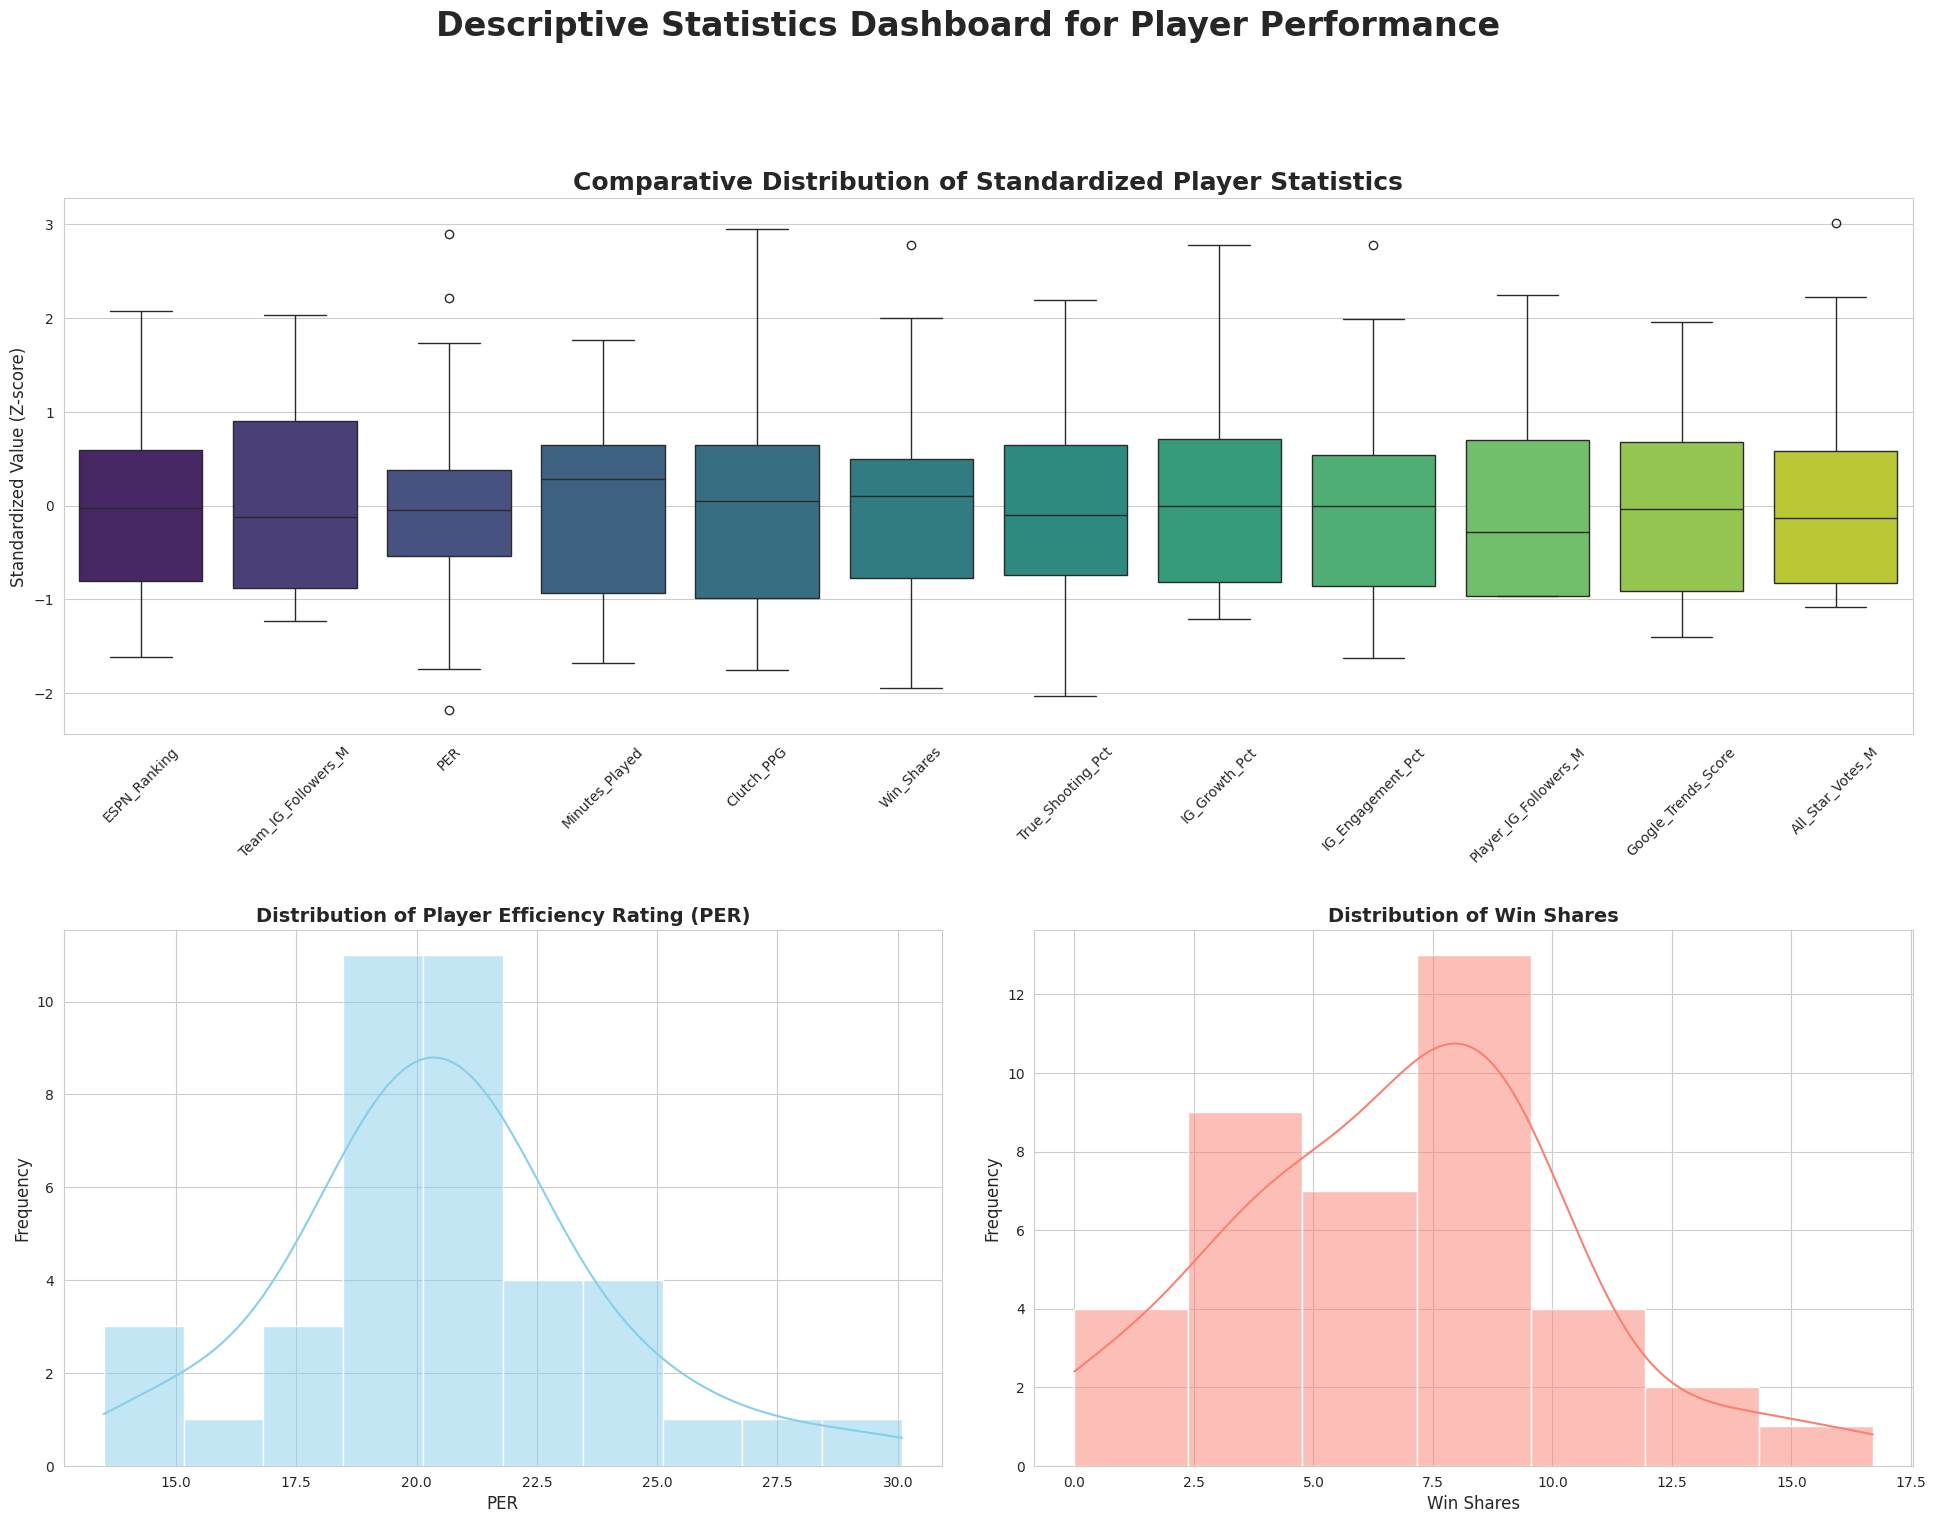

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

stats = {
    'ESPN_Ranking': {'mean': 20.5, 'std': 11.69, 'min': 1.0, 'max': 40.0},
    'Team_IG_Followers_M': {'mean': 7.42, 'std': 7.81, 'min': 1.42, 'max': 32.72},
    'PER': {'mean': 20.58, 'std': 3.86, 'min': 13.5, 'max': 30.7},
    'Minutes_Played': {'mean': 2042.85, 'std': 632.23, 'min': 574.0, 'max': 3036.0},
    'Clutch_PPG': {'mean': 2.5, 'std': 1.03, 'min': 0.5, 'max': 5.6},
    'Win_Shares': {'mean': 6.3, 'std': 3.31, 'min': 0.0, 'max': 16.7},
    'True_Shooting_Pct': {'mean': 59.21, 'std': 3.25, 'min': 52.3, 'max': 68.7},
    'IG_Growth_Pct': {'mean': 24.86, 'std': 49.62, 'min': 0.0, 'max': 203.29},
    'IG_Engagement_Pct': {'mean': 4.7, 'std': 3.49, 'min': 0.0, 'max': 16.77},
    'Player_IG_Followers_M': {'mean': 10.15, 'std': 26.14, 'min': 0.28, 'max': 159.82},
    'Google_Trends_Score': {'mean': 20.97, 'std': 13.47, 'min': 3.51, 'max': 51.13},
    'All_Star_Votes_M': {'mean': 1.22, 'std': 1.21, 'min': 0.07, 'max': 4.44},
}
np.random.seed(42)
data = pd.DataFrame()
for col, val in stats.items():
    data[col] = np.random.normal(loc=val['mean'], scale=val['std'], size=40)
    data[col] = data[col].clip(val['min'], val['max'])

# Select only numeric columns for processing
numeric_cols = data.select_dtypes(include=np.number)

# Standardize the data for the main comparative box plot
# This puts all variables on a common scale for fair comparison
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns)

# Set up the overall figure and grid layout
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 2) # This creates a 2x2 grid for subplots

# --- Top Plot (spanning both columns): The Standardized Box Plot for comparison
ax1 = fig.add_subplot(gs[0, :]) # Add subplot to the first row, spanning all columns
sns.boxplot(data=scaled_df, ax=ax1, palette='viridis')
ax1.set_title('Comparative Distribution of Standardized Player Statistics', fontsize=18, weight='bold')
ax1.set_ylabel('Standardized Value (Z-score)', fontsize=12)
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=45, labelsize=10) # Rotate labels for readability

# --- Bottom-Left Plot: Detailed Histogram for Player Efficiency Rating (PER)
ax2 = fig.add_subplot(gs[1, 0])
sns.histplot(data=data, x='PER', kde=True, ax=ax2, color='skyblue')
ax2.set_title('Distribution of Player Efficiency Rating (PER)', fontsize=14, weight='bold')
ax2.set_xlabel('PER', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

# --- Bottom-Right Plot: Detailed Histogram for Win Shares
ax3 = fig.add_subplot(gs[1, 1])
sns.histplot(data=data, x='Win_Shares', kde=True, ax=ax3, color='salmon')
ax3.set_title('Distribution of Win Shares', fontsize=14, weight='bold')
ax3.set_xlabel('Win Shares', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)

# Add an overall title for the entire figure and adjust layout to prevent overlap
fig.suptitle('Descriptive Statistics Dashboard for Player Performance', fontsize=24, weight='bold', y=1.03)
fig.tight_layout(pad=3.0)

# Save the final figure to a file
plt.savefig('improved_descriptive_statistics.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()